In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("cleaned_df.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,avg_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,12.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,12.0


In [4]:
df["Success"] = df["G3"].apply(lambda x: 1 if x >=10 else 0 )
df.drop("G3",axis=1)
X,y = df.drop("Success",axis=1),df["Success"]

In [5]:
df_copy = df.copy()
binary_encoder = LabelEncoder()
# These are the columns affecting the target from our hypothesis testing
columns = ['school', 'sex', 'address', 'schoolsup', 'higher', 'internet']
for col in columns:
    df_copy[f'{col}2'] = binary_encoder.fit_transform(df[f'{col}'])
df_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G3,avg_Grade,Success,school2,sex2,address2,schoolsup2,higher2,internet2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,11,5.5,1,0,0,1,1,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,11,10.0,1,0,0,1,0,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,6,12,12.5,1,0,0,1,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,14,14.0,1,0,0,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,13,12.0,1,0,0,1,0,1,0


In [6]:
columns2=[f"{c}2"for c in columns]
# These features have strong correlation with our targeet variable
columns2.extend(['avg_Grade',"Dalc","goout"])
columns2

['school2',
 'sex2',
 'address2',
 'schoolsup2',
 'higher2',
 'internet2',
 'avg_Grade',
 'Dalc',
 'goout']

In [7]:
X = df_copy[columns2]
y = df_copy['Success']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def classification(X, y):
    X_encoded = pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return report, accuracy

X, y = df.drop("Success", axis=1), df["Success"]

report, accuracy = classification(X, y)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.978494623655914
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.97      1.00      0.99        78

    accuracy                           0.98        93
   macro avg       0.99      0.93      0.96        93
weighted avg       0.98      0.98      0.98        93



d:\Year 3\Term 2\Data Science\Data Science Project\Exploring-Factors-Influencing-Student-Success-in-Universities\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
nb_classifier = GaussianNB()
    
# Fit the classifier to the training data
# nb_classifier.fit(X_train_encoded, y_train)
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
# y_pred = nb_classifier.predict(X_test_encoded)
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)
print("Accuracy:", accuracy)
print("Report", report)

Accuracy: 0.3870967741935484
Report               precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.21      1.00      0.34        12
           C       0.57      0.13      0.21        31
           D       0.25      0.06      0.10        16
           F       0.79      0.73      0.76        26

    accuracy                           0.39        93
   macro avg       0.36      0.38      0.28        93
weighted avg       0.48      0.39      0.34        93



C:\Users\omarw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\omarw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\omarw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [ ]:
neighbors = list(range(1, 27, 2))
mean_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # scores = cross_val_score(knn, X, y, cv=7, scoring='accuracy')
    # mean_scores.append(np.mean(scores))

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Report:", report)


Accuracy: 0.7204301075268817
Report:               precision    recall  f1-score   support

           A       0.88      0.88      0.88         8
           B       0.64      0.58      0.61        12
           C       0.69      0.81      0.75        31
           D       0.56      0.31      0.40        16
           F       0.79      0.88      0.84        26

    accuracy                           0.72        93
   macro avg       0.71      0.69      0.69        93
weighted avg       0.71      0.72      0.71        93



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6236559139784946


C:\Users\omarw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Gaussian Naive Bayes model accuracy(in %): 100.0
========== Class 0 =========
mean =  [5.006 3.428]
cov =  [[0.121764 0.      ]
 [0.       0.140816]]
========== Class 1 =========
mean =  [5.936 2.77 ]
cov =  [[0.261104 0.      ]
 [0.       0.0965  ]]


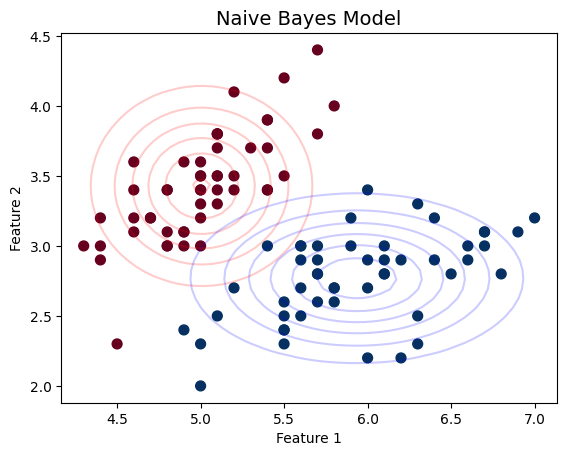

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X = X[y!=2, :]
y = y[y!=2]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Gaussian Naive Bayes model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)
def plot_naive_bayes(X, y, model, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
    ax.set_title('Naive Bayes Model', size=14)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xg = np.linspace(xlim[0], xlim[1], 60)
    yg = np.linspace(ylim[0], ylim[1], 40)
    xx, yy = np.meshgrid(xg, yg)
    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

    for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        mean1 = model.theta_[label, :]
        mean = np.mean(X[mask], axis=0)
        std1 = np.std(X[mask, 0])
        std2 = np.std(X[mask, 1])
        cov = np.diag([np.square(std1), np.square(std2)])
        print("========== Class %.f =========" %label)
        print("mean = ", mean)
        print("cov = ", cov)
        dist = scipy.stats.multivariate_normal(mean=mean, cov=cov)
        P = dist.pdf(Xgrid)
        ax.contour(xx, yy, P.reshape(xx.shape),
        colors=color, alpha=0.2)
    ax.set(xlim=xlim, ylim=ylim)
plot_naive_bayes(X, y, gnb)
